# Name: Onkar Shinde

# Prediction Using Unsupervised Machine Learning

# Problem Statement:
### From the given 'iris' dataset, predict the optimum number of clusters and represent it visually.

# K-Means Clustering

# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets

# Import the iris dataset

In [3]:
iris = pd.read_csv("Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_df = pd.DataFrame(iris)
iris_df.tail() #Fetching last 5 elements of the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Knowing our data more

In [5]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.shape

(150, 6)

In [7]:
iris_df.size

900

In [8]:
iris_df.info() # All iris data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Visualization of the Data

<Figure size 360x360 with 0 Axes>

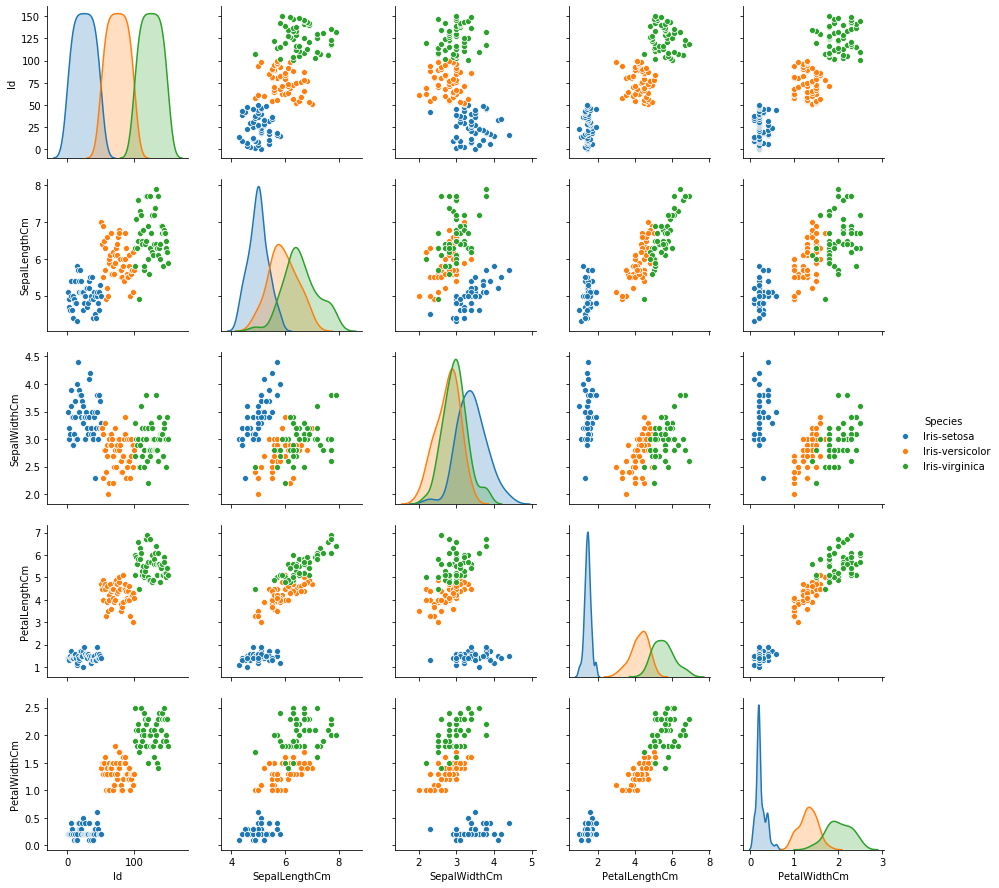

In [10]:
plt.figure(figsize=(5,5))
sns.color_palette("rainbow")
sns.pairplot(iris, hue = "Species")
plt.show()

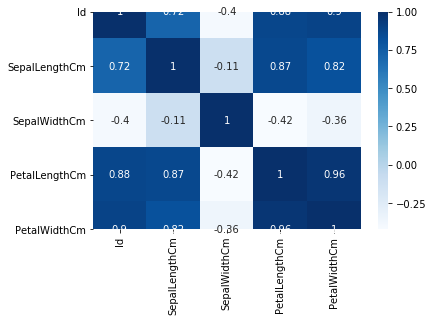

In [11]:
sns.heatmap(iris.corr(), cmap = 'Blues', annot = True)
plt.show()

# Finding the optimum number of clusters for K-Means.Determining the value of K.

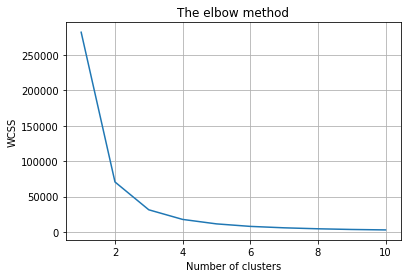

In [12]:
x = iris_df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# Plotting the results onto a line graph,
#'allowing us to observe 'The elbow'
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
#within cluster sum of squares
plt.ylabel('WCSS')
plt.grid()
plt.show()

#### We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares(WCSS) doesn't decrease significantly with every iteration.

In [13]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [14]:
# Without Standardization
km=KMeans(n_clusters = 3, max_iter = 100, init = 'k-means++')
y_kmeans1=km.fit_predict(x)
y_kmeans1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Plotting With Standardization

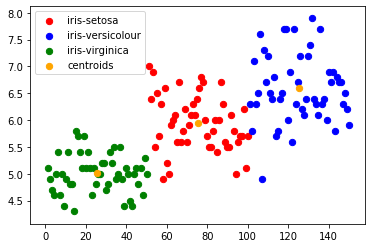

In [15]:
plt.scatter(x[y_kmeans1 ==0, 0], x[y_kmeans1 == 0,1],
           s=40, c = 'red', label = 'iris-setosa')
plt.scatter(x[y_kmeans1 == 1, 0], x[y_kmeans1 == 1,1],
           s = 40, c = 'blue', label = 'iris-versicolour')
plt.scatter(x[y_kmeans1 == 2, 0], x[y_kmeans1 == 2,1],
           s = 40, c = 'green', label = 'iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
           s = 40, c = 'orange', label = 'centroids')
plt.legend()

# Hierarchical Clustering
#### In hierarchical clustering, these new step also consist of finding the optimal number of cluster. Only this time we are not going to use the scree plot or elbow method. We are going to use the dendrogram.

In [27]:
# Import the necessary packages for Hierarchical Clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

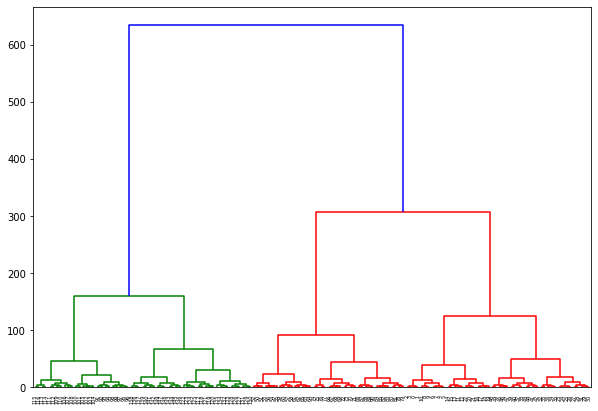

In [23]:
x = iris.iloc[:,0:4].values
plt.figure(figsize=(10, 7))
P = sch.linkage(x, 'ward')
dendrogram = shc.dendrogram(P)

### Interpretation:
From the above dendrogram we can see that the largest distance that we can vertically without crossing any horizontal line. lets count the number of lines on the diagram and determine the optimal number of clusters. cluster number will be three for this dataset.

# Plotting Without Standardization

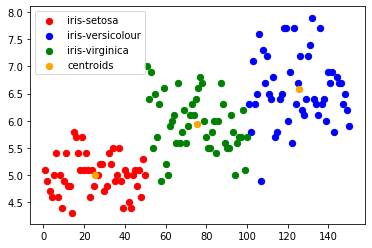

In [37]:
#Visualizing the clusters - on the first two columns
plt.scatter(x[y_kmeans ==0, 0], x[y_kmeans == 0,1],
           s=40, c = 'red', label = 'iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 40, c = 'blue', label = 'iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 40, c = 'green', label = 'iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 40, c = 'orange', label = 'centroids')
plt.legend()

### Conclusion:
As we can notice that both the results that we got using KMeans and Hierarchical clustering are very simillar but we achieved better accuracy using Hierarchical Clustering. Because in hierarchical clustering of wards method minimize the within cluster variance.